<a href="https://colab.research.google.com/github/etappau/Images/blob/master/Paul_assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 5: IMDB review sample Classification with fast.ai Deep Learning Framework

In [0]:
import pickle
import pandas as pd

Chnage runtime to GPU as hardware accelarator

In [0]:
from google.colab import files
uploaded = files.upload()

Saving imdb-sample.pickle to imdb-sample (2).pickle


Code to pickle the training & validation datasets in classwork 4
filename="imdb-sample.pickle"
with open(filename, 'wb') as fp:
    pickle.dump([train, test],fp)

**Question 1: (10 points)**

Export the sample data set you created in [Classwork 3](https://colab.research.google.com/drive/1be7ksupqRkdjU1fZUAS37F5GiLCkFzkR) with pickle library, name it `imdb-sample.pickle`, and upload it to Google Colab. Then run the following codes.

In [0]:
from fastai.text import *
path = Path('.')
with open("imdb-sample.pickle", 'rb') as f:
    train, valid = pickle.load(f)
valid.tail()

,text,sentiment
995,"This is my opinion of this movie, expressed in...",0
996,Why can't a movie be rated a zero? Or even a n...,0
997,The Gun is probably the worst film I've ever s...,0
998,If you are thinking of going to see this film ...,0
999,This movie was like a gathering of people that...,0


You should see the output like this:

![](https://github.com/wshuyi/github_pub_img/raw/master/assets/2019-03-26-10-11-10-085256.png)

In [0]:
train.head()

,text,sentiment
0,I have watched this episode more often than an...,1
1,"As many reviewers here have noted, the film ve...",1
2,"At first,this movie seems so bad that i almost...",1
3,Was this based on a comic-book? A video-game? ...,1
4,Melissa Joan Hart shines! This show is amazing...,1


**Question 2: (10 points)**

Create a TextLMDataBunch instance called `data_lm`, load your train and valid Dataframe into it, and run the following code.

In [0]:
train.sentiment.value_counts()

1    1000
0    1000
Name: sentiment, dtype: int64

In [0]:
valid.sentiment.value_counts()

1    500
0    500
Name: sentiment, dtype: int64

In [0]:
type(train)

pandas.core.frame.DataFrame

In [0]:
type(valid)

pandas.core.frame.DataFrame

Why are we doing this? The reason is because there is a somewhat standard approach starting to appear for text classification datasets which is to have your training set as a CSV file with the labels first, and the text of the NLP documents second.
https://github.com/cedrickchee/knowledge/blob/master/courses/fast.ai/deep-learning-part-2/2018-edition/lesson-10-transfer-learning-nlp.md

In [0]:
#creating pandas series separate for each column per dataframe
trn_texts = train.loc[0:1999, 'text'].values
trn_labels = train.loc[0:1999, 'sentiment'].values
val_texts = valid.loc[0:999, 'text'].values
val_labels = valid.loc[0:999, 'sentiment'].values

In [0]:
col_names = ['labels','text']
df_trn = pd.DataFrame({'text':trn_texts, 'labels':trn_labels}, columns=col_names)
df_val = pd.DataFrame({'text':val_texts, 'labels':val_labels}, columns=col_names)

In [0]:
df_trn.head()

,labels,text
0,1,I have watched this episode more often than an...
1,1,"As many reviewers here have noted, the film ve..."
2,1,"At first,this movie seems so bad that i almost..."
3,1,Was this based on a comic-book? A video-game? ...
4,1,Melissa Joan Hart shines! This show is amazing...


In [0]:
df_trn.tail()

,labels,text
1995,0,"Is rich, ailing Elizabeth Taylor courting the ..."
1996,0,The movie itself is not too bad; many comments...
1997,0,I feel much less generous with this film than ...
1998,0,It SURPRISINGLY had a plot! ;) I've seen movie...
1999,0,This movie could have been 15 minutes long if ...


In [0]:
df_val.head()

,labels,text
0,1,Bug Juice changed my life. I Know it sounds st...
1,1,"As many of today's movies are guilty of, the p..."
2,1,This is one of the best movies I have ever see...
3,1,This movie took me by surprise. The opening cr...
4,1,I am salivating for the sequels. I needed some...


In [0]:
df_val.tail()

,labels,text
995,0,"This is my opinion of this movie, expressed in..."
996,0,Why can't a movie be rated a zero? Or even a n...
997,0,The Gun is probably the worst film I've ever s...
998,0,If you are thinking of going to see this film ...
999,0,This movie was like a gathering of people that...


In [0]:
# Language model data
data_lm = TextLMDataBunch.from_df('./', train_df=df_trn, valid_df=df_val)

In [0]:
data_lm.show_batch()

idx,text
0,"very moment . xxmaj mary xxmaj xxunk , who i seem to remember from xxup snl or some other xxup tv comedy skit show , is the evil wife , and xxmaj larry xxmaj drake plays the lunatic in the xxunk xxmaj santa outfit . i had forgotten xxmaj santa was played by xxmaj drake over the years . xxmaj his xxmaj santa is an unstoppable force and quite"
1,"these days . \n \n i understand it 's a movie and that 's why i accept it as a funny situation . xxmaj plus , the humor is versatile . xxmaj there are moments involving xxup xxunk , funny lines with xxmaj chabat 's best friend , some lesbian references , funny situations involving the family women , and more . \n \n xxmaj charlotte xxmaj xxunk"
2,"xxmaj chocolat before my viewing of it . i did n't know anything about the story , the cast , the director , or anything about the film 's history . xxmaj all i knew was it was a highly - acclaimed xxmaj french film . xxmaj had i known more , i probably would n't have viewed the picture with an open mind . xxmaj on paper ,"
3,"xxunk xxmaj digital xxunk xxmaj surround xxmaj sound . xxup dvd also an jam session with xxmaj sandler & xxmaj cheadle , an featurette , photo montage and previews . i was expecting more for the xxup dvd features like an audio commentary track by the director and deleted scenes . "" xxmaj reign xxmaj over xxmaj me "" is certainly one of the best films that came out"
4,"his stuntmen were injured during this movie that nobody would insure them anymore - xxmaj jackie had to take responsibility himself . xxmaj there are no gimmicks , wires or stand - ins - it is all true - life action that is a treat to watch . xxmaj it is this type of action that made him the phenomenon that he is and it is a movie that"


You should see the output like this:

![](https://github.com/wshuyi/github_pub_img/raw/master/assets/2019-03-26-10-14-25-459713.png)

xxbos: Begining of a sentence
xxfld: Represent separate parts of a document like title, summary etc., each one will get a separate field and so they will get numbered (e.g. xxfld 1, xxfld 2).
xxup: If there's something in all caps, it gets lower cased and a token called xxup will get added to it. Words that are fully capitalized, such as “I AM SHOUTING”, are tokenized as “xxup i xxup am xxup shouting“
xxunk: token used instead of an uncommon word.
xxmaj: token indicates that there is capitalization of the word. “The” will be tokenized as “xxmaj the“.
xxrep: token indicates repeated word, if you have 29 ! in a row, (i.e. xxrep 29 !)

**Question 3: (10 points)**

Create a `language_model_learner` named `learn`, use `data_lm` as input data, `AWD_LSTM` as architecture, and choose 0.5 as Dropout rate. Draw the result of learning rate finder.

In [0]:
data_lm.vocab.itos[:20]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 'the',
 '.',
 ',',
 'a',
 'and',
 'of',
 'to',
 'is',
 'it',
 'in',
 'i']

In [0]:
data_lm.train_ds[0][0].data[:10]

array([  2,  19,  42, 334,  20, 385,  71, 417,  94, 121])

In [0]:
# Language model
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5)

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


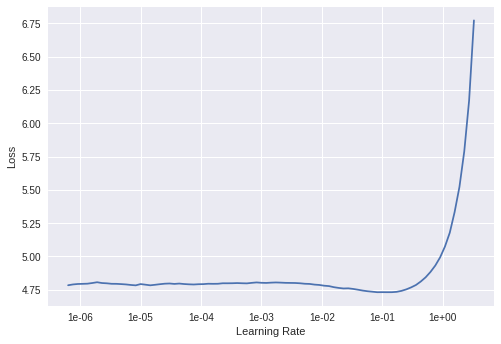

In [0]:
learn.recorder.plot()

Eventually, the learning rate is too high that loss will get worse. Looking at the plot of learning rate against loss we determine the lowest point (around 1e-1 for the plot below) and go back by one magnitude and choose that as a learning rate

You should see the output like this:

![](https://github.com/wshuyi/github_pub_img/raw/master/assets/2019-03-26-10-17-47-701082.png)

**Question 4: (20 points)**

Fit one cycle with your language learner (`learn`), unfreeze it and fit another 3 cycles. Save the language learner's encoder as `ft_enc`.

In [0]:
#Train the model with learning rate 1e-2 using fit_one_cycle.
learn.fit_one_cycle(1, 1e-2)



epoch,train_loss,valid_loss,accuracy,time
0,4.447799,4.003883,0.284581,01:03


First argument ‘1’ is number of epoch runs . We get an accuracy of 28% after running just one epoch.

It trained last layers and basically left most of the model exactly as it was. But what we really want is to train the whole model. Normally after we fine-tune the last layers, the next thing we do is we go unfreeze (unfreeze the whole model for training) and train the whole thing.

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(3, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,4.275689,4.099223,0.271198,01:16
1,4.012393,3.978815,0.284612,01:16
2,3.432346,3.971893,0.285951,01:16


You should see the output like this:

![](https://github.com/wshuyi/github_pub_img/raw/master/assets/2019-03-26-10-20-09-953060.png)

In [0]:
learn.save('ft_enc')

In [0]:
learn.load('ft_enc');

In [0]:
learn.predict("this is a review about", n_words = 10)

'this is a review about five West Wing , previous Swedish films'

In [0]:
learn.save_encoder('ft_enc')

**Question 5: (10 points)**

Create a TextClasDataBunch instance called `data_clas`, load your train and valid Dataframe into it, use the vocab from `data_lm.train_ds.vocab`, set batch size as 32, and run the following code.

In [0]:
# Classifier model data
data_clas = TextClasDataBunch.from_df('./', train_df=df_trn, valid_df=df_val, vocab=data_lm.train_ds.vocab, bs=32)


In [0]:
data_clas.show_batch()

text,target
"xxbos xxmaj the freedom of having your own xxmaj sea xxmaj going xxmaj power xxmaj boat , the excitement of going on underwater adventures a rugged , an 's man of an adventurer and xxunk so well endowed ! ) xxunk in fine xxmaj bikinis were all definite selling points for "" xxup sea xxup xxunk - 61 ) . \n \n xxmaj just what was the reason for",1
"xxbos i have never seen any of xxmaj spike xxmaj lee 's prior films , as their trailers never caught my interest . i have seen , and admire xxmaj denzel xxmaj washington , and xxmaj jodie xxmaj foster 's work , and have several of their dvds . i was , however , entirely disappointed with this movie . xxmaj if this film is any indication of xxmaj spike",0
"xxbos xxmaj the movie "" macarthur "" begins and ends at xxmaj gen. xxmaj douglas macarthur 's , xxmaj gregory xxmaj peck , xxmaj xxunk xxmaj mata the xxup us xxmaj military xxmaj academy of xxmaj west xxmaj point on the xxmaj hudson . xxmaj we see a frail 82 year old xxmaj xxunk . macarthur give the commencement speech to the xxunk class of 1962 about what an honor",1
"xxbos xxmaj watching xxmaj cliffhanger makes me nostalgic for the early ' 90s , a time when virtually every new action movie could be described as "" xxmaj die xxmaj hard in a / on a. "" xxmaj cliffhanger is "" xxmaj die xxmaj hard on a mountain , "" and pretty good , for what it is . \n \n xxmaj but unlike xxmaj passenger xxunk and xxmaj",1
"xxbos i remember watching this late at night on black and white xxup tv , long before a live - action version was so much as a twinkle in xxmaj peter xxmaj jackson 's eye ... and being very impressed . xxmaj finally getting my hands this week on a xxup vhs copy that was being thrown away ( and is n't that just par for the course .. ?",1


You should see the output like this:

![](https://github.com/wshuyi/github_pub_img/raw/master/assets/2019-03-26-10-24-53-893234.png)

**Question 6: (10 points)**

Create a `text_classifier_learner` named `learn`, use `data_clas` as input data, `AWD_LSTM` as architecture, and choose 0.5 as Dropout rate. Note to compare the result with Scikit-learn and textblob later, you need to make sure Precision and Recall are in the metrics list. Load the encoder  (`ft_enc`) you saved just now into `learn`. Draw the result of learning rate finder.

In [0]:
precision = Precision()

In [0]:
recall = Recall()

In [0]:
metrics_new = accuracy,precision,recall

In [0]:
# Classifier
classifier = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5, metrics=metrics_new)
classifier.load_encoder('ft_enc')

In [0]:
classifier.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


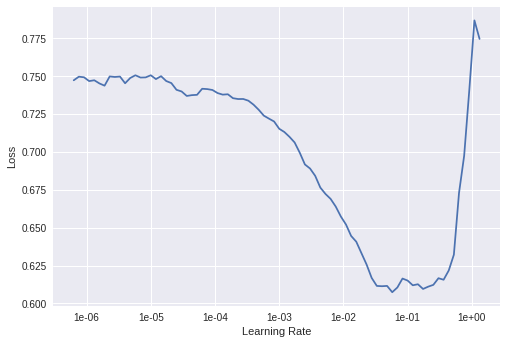

In [0]:
classifier.recorder.plot()

You should see the output like this:

![](https://github.com/wshuyi/github_pub_img/raw/master/assets/2019-03-26-10-27-55-239469.png)

**Question 7: (20 points)**

Fit one cycle with your text classifier learner (`learn`). Unfreeze the last two layers, and fit 3 cycles. Then unfreeze it totally, and fit another 2 cycles. Show the training result.

The learning rate around 2e-2 seems right, so let us train the classifier:

In [0]:
classifier.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,precision,recall,time
0,0.474608,0.415498,0.827000,0.822485,0.834000,00:57


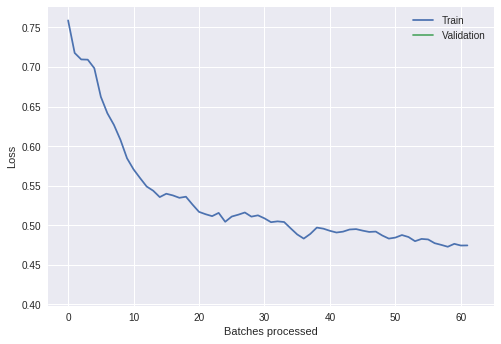

In [0]:
classifier.recorder.plot_losses()

In [0]:
classifier.freeze_to(-2)

In [0]:
classifier.fit_one_cycle(3, slice(5e-3/2., 5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,precision,recall,time
0,0.423727,0.398179,0.814000,0.788603,0.858000,01:06
1,0.349924,0.325603,0.871000,0.904139,0.830000,01:06
2,0.284053,0.307705,0.876000,0.868627,0.886000,01:06


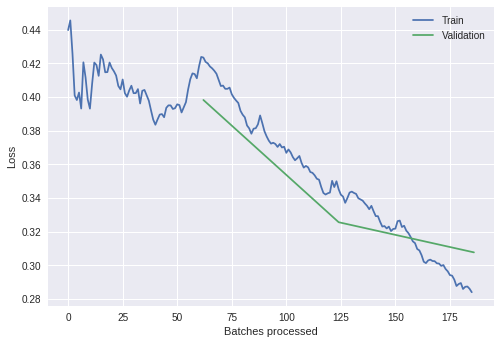

In [0]:
classifier.recorder.plot_losses()

The training loss is still higher than the validation loss so we are not over-fitting yet, there is still scope of improving accuracy by running more epochs.

In [0]:
classifier.unfreeze()

In [0]:
classifier.fit_one_cycle(2, slice(2e-3/100, 2e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,precision,recall,time
0,0.239641,0.318236,0.874000,0.855513,0.900000,02:01
1,0.202923,0.312596,0.879000,0.879759,0.878000,01:58


You should see the output like this:

![](https://github.com/wshuyi/github_pub_img/raw/master/assets/2019-03-26-10-31-32-631875.png)

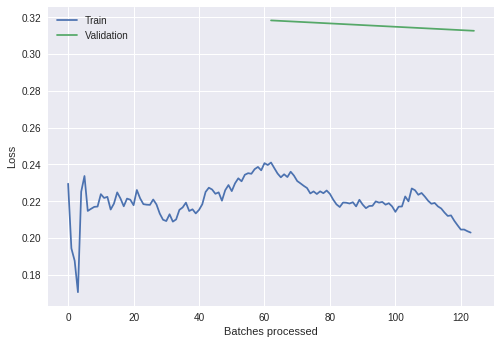

In [0]:
classifier.recorder.plot_losses()

In [0]:
classifier.predict("This was a great movie!")

(Category 1, tensor(1), tensor([0.0188, 0.9812]))

In [0]:
classifier.predict("This was a not great movie!")

(Category 0, tensor(0), tensor([0.5280, 0.4720]))

In [0]:
from fastai.vision import *

In [0]:
preds,y = classifier.get_preds()

In [0]:
interp = ClassificationInterpretation.from_learner(classifier)

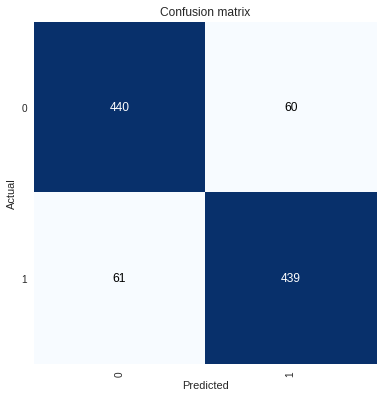

In [0]:
interp.plot_confusion_matrix()

**Question 8: (10 points)**

Comparing the result with those from textblob, scikit-learn in Classwork 3, what is your finding? How about comparing with the result from Self-study 7 (the whole IMDB dataset)? Write down your answer and comments.

*Your answer here:*



Confusion matrix from textblob
array([[217, 283],
       [ 22, 478]])
       
 Confusion matrix from scikit-learn
 array([[424,  76],
       [110, 390]])
       
 Comparing the two results with fast ai text classifier, it can be reasonably concluded that fast ai accuracy is better.
 Because there is still scope of improving accuracy by running more epochs in fast ai, we can definitely achieve better results compared to others.
 But at the same time it is time consuming the fine tuning part, so slower than the other approaches.Also I realised I didn't have to change runtime when running this exercise with textblob & scikit learn.
 
 I cannot be certain about the test results from self study 7 wherein we trained the entire IMDB dataset. Because of lack of GPU resources, I was not able to train my language model for the entire 10 epochs as prescribed. Still I was able to achieve 92% accuracy with the encoder i was able to save.
 
 In my opinion, fast ai is better at predicting outcome with accuracy but time consuming.